In [62]:
%matplotlib inline
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Load the data into a Dataframe
# data of bid_won
df_won = pd.read_csv('./large_files/revised_data_won.csv')

df_won.head(6)

,Unnamed: 0,id,version,width,creative_id,ad,meta,cpm,pb_ag,size,...,original_currency,pb_dg,media_type,bidder,adserver_targeting,status,original_cpm,bidder_code,time_to_respond,params
0,0,1,0,NaN,2966:194308,NaN,NaN,0.200000,0.20,300x250,...,USD,0.20,banner,NaN,NaN,rendered,0.200000,rubicon,329,NaN
1,1,2,0,NaN,2711_76920_8626063,NaN,NaN,0.660000,0.65,300x250,...,USD,0.66,banner,NaN,NaN,rendered,0.660000,triplelift,165,NaN
2,2,3,0,NaN,277233715,NaN,NaN,0.125769,0.10,300x250,...,USD,0.12,banner,NaN,NaN,rendered,0.125769,districtm,883,NaN
3,3,4,0,NaN,10674115,NaN,NaN,0.108300,0.10,300x250,...,USD,0.10,banner,NaN,NaN,rendered,0.108300,conversant,236,NaN
4,4,5,0,NaN,3658_67722_v34nf3yl,NaN,NaN,2.820000,2.80,300x250,...,USD,2.82,banner,NaN,NaN,rendered,2.820000,triplelift,288,NaN
5,5,6,0,NaN,2596:4764695,NaN,NaN,0.031050,0.00,300x250,...,USD,0.03,banner,NaN,NaN,rendered,0.031050,rubicon,389,NaN


In [3]:
df_won.drop(['id', 
             'version', 
             'width', 
             'ad', 
             'meta', 
             'net_revenue', 
             'deal_id', 
             'source', 
             'currency', 
             'pb_lg', 'pb_mg','pb_hg', 'pb_ag', 'pb_dg', 'pb_cg',
             'height', 
             'original_currency', 
             'media_type', 
             'bidder', 
             'adserver_targeting', 
             'params'], axis=1, inplace=True)

In [4]:
df_won['request_datetime'] = df_won['request_timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))

In [5]:
df_won['response_datetime'] = df_won['response_timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))

In [6]:
rslt_df = df_won[df_won['cpm'] < 2]

In [7]:
rslt_df = rslt_df.sort_values(by="request_timestamp")

In [8]:
rslt_df.to_csv('./large_files/revised_data_won_1.csv', sep=',')

In [9]:
top_ad = rslt_df.loc[rslt_df['ad_unit_code'] == '/8024375/ListenOnRepeat_728x90_Top']

In [10]:
top_ad.to_csv('./large_files/bid_won_728x90_Top.csv', sep=',')

In [11]:
top_ad.tail(6)

,Unnamed: 0,creative_id,cpm,size,ad_id,request_id,request_timestamp,ad_unit_code,response_timestamp,status_message,ttl,auction_id,status,original_cpm,bidder_code,time_to_respond,request_datetime,response_datetime
178543,281614,263746662,0.006225,728x90,427c4709bfba6b11,35573e6ff7a44b4a,1616095665482,/8024375/ListenOnRepeat_728x90_Top,1616095666050,Bid available,60,2e375984-5b73-40a1-ab7e-42ea3efef065,rendered,0.006225,gumgum,568,2021-03-19 01:12:45.482,2021-03-19 01:12:46.050
180264,284443,263746662,0.006225,728x90,519f899d4d3fe78c,44804c660d70136e,1616095820449,/8024375/ListenOnRepeat_728x90_Top,1616095821465,Bid available,60,1473ca2b-8135-4e46-8ab1-da11595565e9,rendered,0.006225,gumgum,1016,2021-03-19 01:15:20.449,2021-03-19 01:15:21.465
181911,287138,263746662,0.006225,728x90,6064418352993774,534425f0852dff15,1616095975479,/8024375/ListenOnRepeat_728x90_Top,1616095976589,Bid available,60,31425ff3-89f2-4832-85a6-80a0ab859a13,rendered,0.006225,gumgum,1110,2021-03-19 01:17:55.479,2021-03-19 01:17:56.589
157526,247739,21255819,0.030000,728x90,7754053ee9c828406,768359f2e8b0fb094,1616148299099,/8024375/ListenOnRepeat_728x90_Top,1616148299865,Bid available,300,94729272-af82-4f2e-ac0c-06bc7980e7bd,rendered,0.030000,ix,766,2021-03-19 15:49:59.099,2021-03-19 15:49:59.865
169597,267117,21255819,0.020000,728x90,8866dfd8a560e4ee6,8785d42b8dd88dacd,1616149443050,/8024375/ListenOnRepeat_728x90_Top,1616149443476,Bid available,300,81d976a3-84f5-4f78-afdd-66f6b2bdf0e5,rendered,0.020000,ix,426,2021-03-19 16:09:03.050,2021-03-19 16:09:03.476
88861,139059,142231287,0.016675,728x90,25276656ba2c38044,24625b7a77a3ec913,1617728154685,/8024375/ListenOnRepeat_728x90_Top,1617728155732,Bid available,60,e3f06321-2a50-4ae8-8012-f94856730795,rendered,0.016675,sovrn,1047,2021-04-06 22:40:54.685,2021-04-06 22:40:55.732


In [12]:
top_ad['bidder_code'].unique()

array(['triplelift', 'conversant', 'rubicon', 'gumgum', 'districtmDMX',
       'openx', 'sovrn', 'pubmatic', 'ix', 'districtm'], dtype=object)

In [13]:
df_groupby_bidder = top_ad.groupby('bidder_code')

df_groupby_bidder.first()

,Unnamed: 0,creative_id,cpm,size,ad_id,request_id,request_timestamp,ad_unit_code,response_timestamp,status_message,ttl,auction_id,status,original_cpm,time_to_respond,request_datetime,response_datetime
bidder_code,,,,,,,,,,,,,,,,,
conversant,291,22929_55029048,0.080000,728x90,117143803174fdccf,1088d3c0b70a57316,1616065399165,/8024375/ListenOnRepeat_728x90_Top,1616065399786,Bid available,300,3d9c3247-403f-486d-a41f-7de7fbfed4ac,rendered,0.080000,621,2021-03-18 16:48:19.165,2021-03-18 16:48:19.786
districtm,5790,248032492,0.569642,728x90,870fe50bc475f359,7949c4edbcbddfeb,1616070305551,/8024375/ListenOnRepeat_728x90_Top,1616070305778,Bid available,300,4b3394dd-d281-4e7f-8e21-4769e49187ec,rendered,0.569642,227,2021-03-18 18:10:05.551,2021-03-18 18:10:05.778
districtmDMX,2474,93_sgm9bu8p,0.760000,728x90,294f0e0b987c53df,209d65c5b6ee3bee,1616068377998,/8024375/ListenOnRepeat_728x90_Top,1616068378315,Bid available,3600,bba9ca88-7cc4-41b9-b178-ffe64673c142,rendered,0.760000,317,2021-03-18 17:37:57.998,2021-03-18 17:37:58.315
gumgum,4099,151_872056,0.923700,728x90,1849b2aef7556094,1025064d2318d837,1616066345950,/8024375/ListenOnRepeat_728x90_Top,1616066346340,Bid available,60,783aa64f-8a05-4af1-b73b-e943dc5623d2,rendered,0.923700,390,2021-03-18 17:04:05.950,2021-03-18 17:04:06.340
ix,180,20287231,0.020000,728x90,2446f027ee2034d,169e9dc1a8d9098d,1616068833335,/8024375/ListenOnRepeat_728x90_Top,1616068833731,Bid available,300,89fa5ff7-383d-44f5-a311-543b26ffa4c3,rendered,0.020000,396,2021-03-18 17:45:33.335,2021-03-18 17:45:33.731
openx,25,3168308,0.010000,728x90,687d48bd338d24ef,6120f351d7169821,1616068452149,/8024375/ListenOnRepeat_728x90_Top,1616068452477,Bid available,300,04c5e9ae-0345-4b15-88ee-e1b172782690,rendered,0.010000,328,2021-03-18 17:39:12.149,2021-03-18 17:39:12.477
pubmatic,53,482381539604,0.190000,728x90,559d990ddb3f929,17bcf6e96162d9c,1616068681648,/8024375/ListenOnRepeat_728x90_Top,1616068682081,Bid available,300,0826f5b8-92c5-4ecb-80d3-d8f816719705,rendered,0.190000,433,2021-03-18 17:43:01.648,2021-03-18 17:43:02.081
rubicon,434,2307:bbyp9tza,0.082640,728x90,1264a008010517d74,118061e5f2d91c0ba,1616065430054,/8024375/ListenOnRepeat_728x90_Top,1616065430825,Bid available,300,cedfba7d-7144-4292-b5a3-0a76cb53851c,rendered,0.082640,771,2021-03-18 16:48:50.054,2021-03-18 16:48:50.825
sovrn,508,1974320,0.007323,728x90,7777c7f12da8d109,7013ff33812df1fe,1616068607139,/8024375/ListenOnRepeat_728x90_Top,1616068607892,Bid available,60,f2c95f3d-310f-42fd-b3b0-53377b0c1374,rendered,0.007323,753,2021-03-18 17:41:47.139,2021-03-18 17:41:47.892


In [14]:
df_groupby_bidder.size()

bidder_code
conversant       1160
districtm          71
districtmDMX      536
gumgum           2187
ix               1715
openx            4105
pubmatic          759
rubicon         14112
sovrn            6544
triplelift       5824
dtype: int64

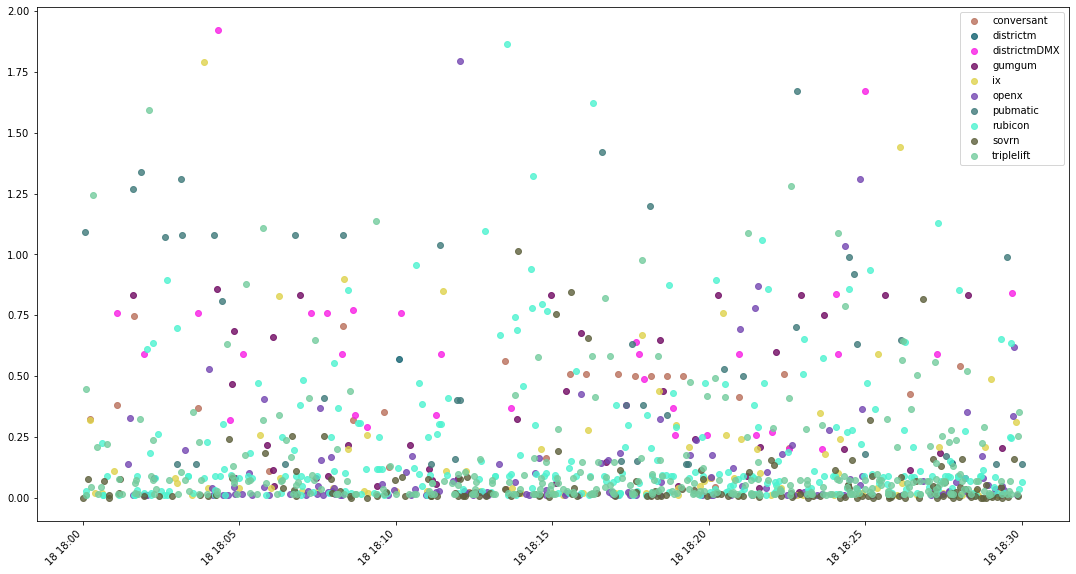

In [68]:
fig, ax = plt.subplots()
fig.autofmt_xdate(rotation=45)
fig.set_size_inches(18.5, 10.5)

# top_ad = top_ad.set_index('request_datetime')
top_date_range = top_ad.between_time('18:00:00', '18:30:00')

for key, grp in top_date_range.groupby(['bidder_code']):
    rgb = np.random.rand(3,)
#     ax = grp.plot(ax=ax, kind='line', x='request_timestamp', y='cpm', c=np.random.rand(3,), label=key)
    ax.scatter(x='response_datetime', y='cpm', alpha=0.8,  color=[rgb], data=grp, label=key) 

plt.legend(loc='best')
plt.show()

In [16]:
df_gumgum = df_groupby_bidder.get_group('gumgum')
df_gumgum.head()

,Unnamed: 0,creative_id,cpm,size,ad_id,request_id,request_timestamp,ad_unit_code,response_timestamp,status_message,ttl,auction_id,status,original_cpm,bidder_code,time_to_respond,request_datetime,response_datetime
2630,4099,151_872056,0.923700,728x90,1849b2aef7556094,1025064d2318d837,1616066345950,/8024375/ListenOnRepeat_728x90_Top,1616066346340,Bid available,60,783aa64f-8a05-4af1-b73b-e943dc5623d2,rendered,0.923700,gumgum,390,2021-03-18 17:04:05.950,2021-03-18 17:04:06.340
82,106,749544,0.047988,728x90,210052497c067be27,203283ff56589277f,1616068802156,/8024375/ListenOnRepeat_728x90_Top,1616068802419,Bid available,60,c65bbbf1-eb0f-4429-b29b-c092788237b3,rendered,0.047988,gumgum,263,2021-03-18 17:45:02.156,2021-03-18 17:45:02.419
34,39,749544,0.047988,728x90,2192cdaadbd72eb0c,212447c851d7ddf2c,1616068833176,/8024375/ListenOnRepeat_728x90_Top,1616068833492,Bid available,60,44d4ee66-aa46-4f41-8cea-6b766e549928,rendered,0.047988,gumgum,316,2021-03-18 17:45:33.176,2021-03-18 17:45:33.492
176,230,734459,0.310733,728x90,228170e5c9e40ae47,221047b80030e9aaa,1616068864174,/8024375/ListenOnRepeat_728x90_Top,1616068864495,Bid available,60,7ddc9d3f-0518-4035-8e0d-860cf5ac4d10,rendered,0.310733,gumgum,321,2021-03-18 17:46:04.174,2021-03-18 17:46:04.495
216,289,749544,0.047988,728x90,23708cd5dc291fe7a,2294682c1f1279ff9,1616068895158,/8024375/ListenOnRepeat_728x90_Top,1616068895424,Bid available,60,84165e2b-e5a0-42e1-9461-3895c50c6516,rendered,0.047988,gumgum,266,2021-03-18 17:46:35.158,2021-03-18 17:46:35.424


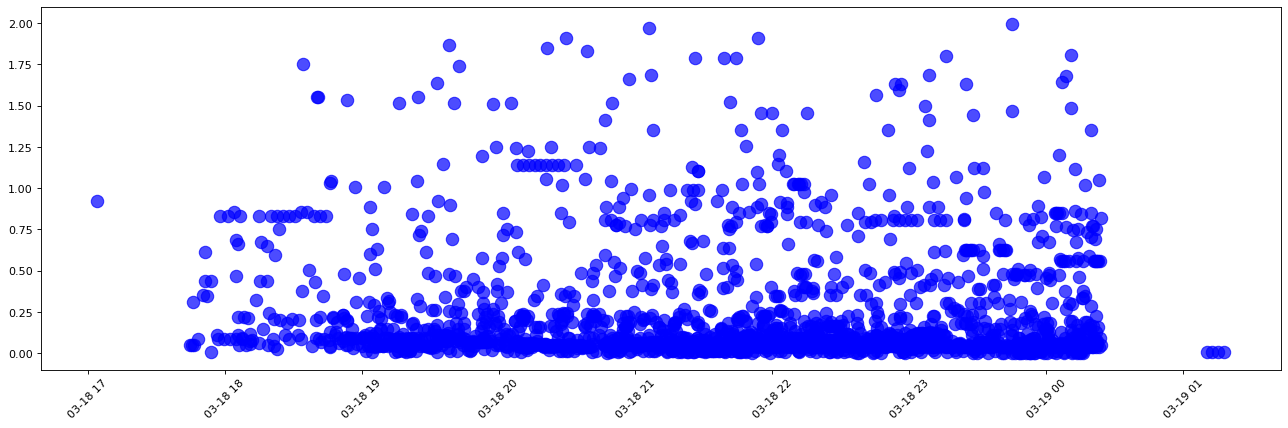

In [65]:
figure(figsize = (20, 6), dpi = 80)

plt.scatter(df_gumgum['response_datetime'], df_gumgum['cpm'],
            marker='o',
            color='b',
            alpha=0.7,
            s = 124)
plt.xticks(rotation=45)
plt.show()

In [24]:
df_gumgum = df_gumgum.set_index('request_datetime')

date_range = df_gumgum.between_time('18:00:00', '20:00:00')

In [26]:
date_range.head(6)

,Unnamed: 0,creative_id,cpm,size,ad_id,request_id,request_timestamp,ad_unit_code,response_timestamp,status_message,ttl,auction_id,status,original_cpm,bidder_code,time_to_respond,response_datetime
request_datetime,,,,,,,,,,,,,,,,,
2021-03-18 18:01:36.795,3434,606280,0.833804,728x90,149db709fc1a1151,658be8b94c75ad5,1616069796795,/8024375/ListenOnRepeat_728x90_Top,1616069797090,Bid available,60,da6825f2-aecc-438e-a358-997280239289,rendered,0.833804,gumgum,295,2021-03-18 18:01:37.090
2021-03-18 18:02:17.506,3478,699648,0.082975,728x90,6729aad624a8385b8,600b54661ea1c866,1616069837506,/8024375/ListenOnRepeat_728x90_Top,1616069837698,Bid available,60,36173ced-40c1-4ced-9ed0-cece5a19e1a4,rendered,0.082975,gumgum,192,2021-03-18 18:02:17.698
2021-03-18 18:04:16.735,4102,606286,0.857771,728x90,2434f6aac0c0a0f98,1716a0a018401b0e8,1616069956735,/8024375/ListenOnRepeat_728x90_Top,1616069957016,Bid available,60,3e5c45cb-8399-4636-82b4-34051387f6db,rendered,0.857771,gumgum,281,2021-03-18 18:04:17.016
2021-03-18 18:04:46.078,4225,279457929,0.466500,728x90,14219855d0fa4e22c,13476b62bb4202be6,1616069986078,/8024375/ListenOnRepeat_728x90_Top,1616069986669,Bid available,60,332e8951-4591-4c99-b3df-82a7d7eba6da,rendered,0.466500,gumgum,591,2021-03-18 18:04:46.669
2021-03-18 18:04:49.994,4255,4744150,0.684225,728x90,25506dd0cb4c3f9d7,24588f42c5378215,1616069989994,/8024375/ListenOnRepeat_728x90_Top,1616069990577,Bid available,60,a6fb507c-ef1f-4cf2-9c04-0da241c9d99d,rendered,0.684225,gumgum,583,2021-03-18 18:04:50.577
2021-03-18 18:04:52.535,4214,699648,0.082975,728x90,760b65ba5eac606b8,6856ce2d3f79fad6,1616069992535,/8024375/ListenOnRepeat_728x90_Top,1616069992801,Bid available,60,3495f8ba-265f-4025-8a4a-4a93d857432b,rendered,0.082975,gumgum,266,2021-03-18 18:04:52.801


(105, 17)


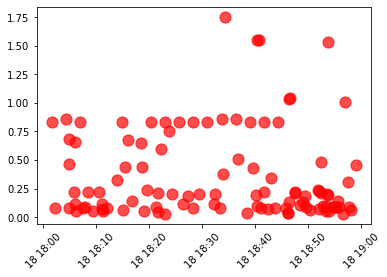

In [54]:
print(date_range.shape)

plt.scatter(date_range['response_datetime'], date_range['cpm'],
            marker='o',
            color='r',
            alpha=0.7,
            s = 124)
plt.xticks(rotation=45)
plt.show()

(6, 17)


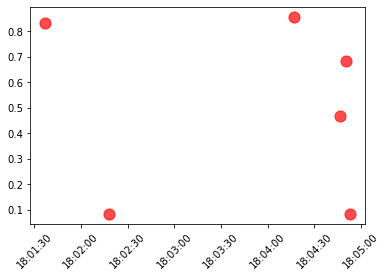

In [55]:
date_range = df_gumgum.between_time('18:00:00', '18:05:00')
print(date_range.shape)

plt.scatter(date_range['response_datetime'], date_range['cpm'],
            marker='o',
            color='r',
            alpha=0.7,
            s = 124)
plt.xticks(rotation=45)
plt.show()

(22, 17)


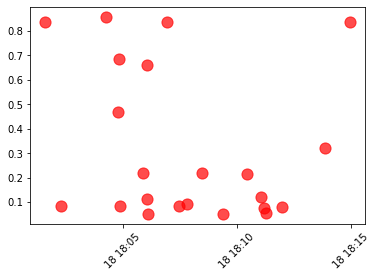

In [56]:
date_range = df_gumgum.between_time('18:00:00', '18:15:00')
print(date_range.shape)

plt.scatter(date_range['response_datetime'], date_range['cpm'],
            marker='o',
            color='r',
            alpha=0.7,
            s = 124)
plt.xticks(rotation=45)
plt.show()

(45, 17)


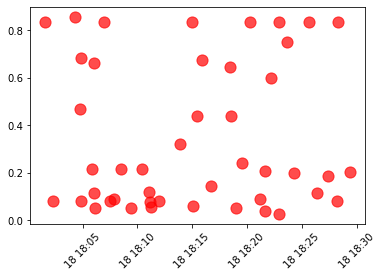

In [57]:
date_range = df_gumgum.between_time('18:00:00', '18:30:00')
print(date_range.shape)

plt.scatter(date_range['response_datetime'], date_range['cpm'],
            marker='o',
            color='r',
            alpha=0.7,
            s = 124)
plt.xticks(rotation=45)
plt.show()

(347, 17)


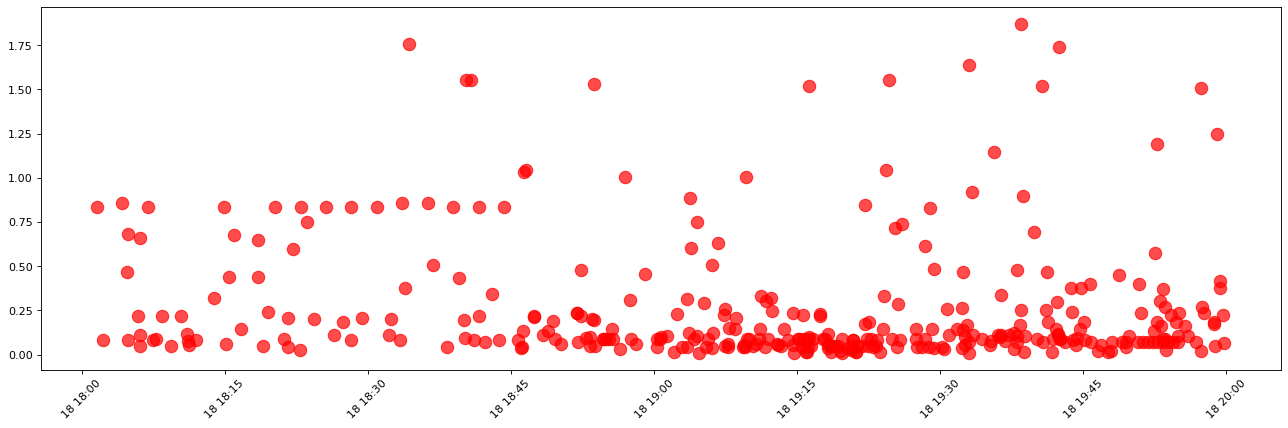

In [63]:
date_range = df_gumgum.between_time('18:00:00', '20:00:00')
print(date_range.shape)

figure(figsize = (20, 6), dpi = 80)

plt.scatter(date_range['response_datetime'], date_range['cpm'],
            marker='o',
            color='r',
            alpha=0.7,
            s = 124)
plt.xticks(rotation=45)
plt.show()